In [121]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
def get_marg_box(num_classes, var_ansatz):
    
    def marg_and_g(num_classes, r, var_ansatz, num_layers):
        marg_dist, g_gap = np.array([]), np.array([])
        for exp in range(1,51):
            PATH = f"results/{num_classes}C/{r}R/4Q/{var_ansatz}/{num_layers}L_500MS_10BS_0.001LR_50conv/20S/{exp}E/"
            marg_dist = np.append(marg_dist, np.load(PATH + "margin_dist.npy"))
            f = open(PATH + "results.txt", "r")
            lines = f.readlines()
            g = float(lines[2][20:-1])
            g_gap = np.append(g_gap, g)
        return marg_dist, g_gap
    
    num_layers_list = [2, 4, 6, 8, 10]
    marg0_array, marg50_array, marg100_array = np.zeros((20 * 50, len(num_layers_list))), np.zeros((20 * 50, len(num_layers_list))), np.zeros((20 * 50, len(num_layers_list)))
    for (i,num_layers) in enumerate(num_layers_list):
        marg0, g0 = marg_and_g(num_classes, 0.0, var_ansatz, num_layers)
        marg50, g50 = marg_and_g(num_classes, 0.5, var_ansatz, num_layers)
        marg100, g100 = marg_and_g(num_classes, 1.0, var_ansatz, num_layers)
        marg0_array[:,i] = marg0
        marg50_array[:,i] = marg50
        marg100_array[:,i] = marg100
    
    fig, ax = plt.subplots()
    position = np.array([0, 1, 2, 3, 4])
    bp1 = ax.boxplot(marg0_array, positions=position, widths=0.1, patch_artist=True, boxprops=dict(facecolor="C0"))
    bp2 = ax.boxplot(marg50_array, positions=position + 0.2, widths=0.1, patch_artist=True, boxprops=dict(facecolor="C1"))
    bp3 = ax.boxplot(marg100_array, positions=position + 0.4, widths=0.1, patch_artist=True, boxprops=dict(facecolor="C2"))
    ax.set_xticks(position + 0.2, ['L=2', 'L=4', 'L=6', 'L=8', 'L=10'])
    ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]], ['r=0.0', 'r=0.5', 'r=1.0'], loc='upper right')
    plt.show()


In [119]:
def get_marg_box_multiple(num_classes_list, var_ansatz_list):
    
    def marg_and_g(num_classes, r, var_ansatz, num_layers):
        marg_dist, g_gap, true_error_list = np.array([]), np.array([]), np.array([])
        for exp in range(1,51):
            PATH = f"results/{num_classes}C/{r}R/4Q/{var_ansatz}/{num_layers}L_500MS_10BS_0.001LR_50conv/20S/{exp}E/"
            marg_dist = np.append(marg_dist, np.load(PATH + "margin_dist.npy"))
            f = open(PATH + "results.txt", "r")
            lines = f.readlines()
            true_error = float(lines[1][15:-1])
            g = float(lines[2][20:-1])
            g_gap = np.append(g_gap, g)
            true_error_list = np.append(true_error_list, true_error)
        return marg_dist, g_gap, true_error_list
    
    fig, axes = plt.subplots(len(num_classes_list), len(var_ansatz_list), figsize=(10 * len(num_classes_list), 4 * len(var_ansatz_list)))
    plt.rcParams.update({'font.size': 12})
    g_gap0 = np.zeros((len(num_classes_list), len(var_ansatz_list), 5, 50))
    g_gap50 = np.zeros((len(num_classes_list), len(var_ansatz_list), 5, 50))
    g_gap100 = np.zeros((len(num_classes_list), len(var_ansatz_list), 5, 50))
    te0_array = np.zeros((len(num_classes_list), len(var_ansatz_list), 5, 50))
    te50_array = np.zeros((len(num_classes_list), len(var_ansatz_list), 5, 50))
    te100_array = np.zeros((len(num_classes_list), len(var_ansatz_list), 5, 50))
    for (i,num_classes) in enumerate(num_classes_list):
        for (j,var_ansatz) in enumerate(var_ansatz_list):
            num_layers_list = [2, 4, 6, 8, 10]
            marg0_array, marg50_array, marg100_array = np.zeros((20 * 50, len(num_layers_list))), np.zeros((20 * 50, len(num_layers_list))), np.zeros((20 * 50, len(num_layers_list)))
            for (k,num_layers) in enumerate(num_layers_list):
                marg0, g0, te0 = marg_and_g(num_classes, 0.0, var_ansatz, num_layers)
                marg50, g50, te50 = marg_and_g(num_classes, 0.5, var_ansatz, num_layers)
                marg100, g100, te100 = marg_and_g(num_classes, 1.0, var_ansatz, num_layers)
                marg0_array[:,k] = marg0
                marg50_array[:,k] = marg50
                marg100_array[:,k] = marg100
                g_gap0[i,j,k,:] = g0
                g_gap50[i,j,k,:] = g50
                g_gap100[i,j,k,:] = g100
                te0_array[i,j,k,:] = te0
                te50_array[i,j,k,:] = te50
                te100_array[i,j,k,:] = te100
                
            position = np.array([0, 1, 2, 3, 4])
            bp1 = axes[i,j].boxplot(marg0_array, positions=position, widths=0.2, patch_artist=True, boxprops=dict(facecolor="lightblue"), showfliers=False, medianprops=dict(color='black'))
            bp2 = axes[i,j].boxplot(marg50_array, positions=position + 0.25, widths=0.2, patch_artist=True, boxprops=dict(facecolor="lightgreen"), showfliers=False, medianprops=dict(color='black'))
            bp3 = axes[i,j].boxplot(marg100_array, positions=position + 0.5, widths=0.2, patch_artist=True, boxprops=dict(facecolor="lightyellow"), showfliers=False, medianprops=dict(color='black'))
            axes[i,j].set_xticks(position + 0.25, ['L=2', 'L=4', 'L=6', 'L=8', 'L=10'])
    
    
    
    
    for (i,num_classes) in enumerate(num_classes_list):
        for (j,var_ansatz) in enumerate(var_ansatz_list):
            g0_list, g50_list, g100_list = [], [], []
            te0_list, te50_list, te100_list = [], [], []
            for k in range(5):
                g0 = np.mean(g_gap0[i,j,k,:])
                g50 = np.mean(g_gap50[i,j,k,:])
                g100 = np.mean(g_gap100[i,j,k,:])
                te0 = np.mean(te0_array[i,j,k,:])
                te50 = np.mean(te50_array[i,j,k,:])
                te100 = np.mean(te100_array[i,j,k,:])
                g0_list.append(g0)
                g50_list.append(g50)
                g100_list.append(g100)
                te0_list.append(te0)
                te50_list.append(te50)
                te100_list.append(te100)
            G = axes[i,j].scatter(position, g0_list, c='black', s=100, zorder=10, marker='x', label='Generalization Gap')
            axes[i,j].scatter(position + 0.25, g50_list, c='black', s=100, zorder=10, marker='x')
            axes[i,j].scatter(position + 0.5, g100_list, c='black', s=100, zorder=10, marker='x')
            TE = axes[i,j].scatter(position, te0_list, c='red', s=100, zorder=10, marker='x', label='True Error')
            axes[i,j].scatter(position + 0.25, te50_list, c='red', s=100, zorder=10, marker='x')
            axes[i,j].scatter(position + 0.5, te100_list, c='red', s=100, zorder=10, marker='x')
            axes[i,j].set_ylim([-0.05, 1.05])
            for k in range(5):
                print(f"{num_classes}C {var_ansatz} L={2*(k+1)} r=0.0: {np.mean(g_gap0[i,j,k,:])} +- {np.std(g_gap0[i,j,k,:])}")
                print(f"{num_classes}C {var_ansatz} L={2*(k+1)} r=0.5: {np.mean(g_gap50[i,j,k,:])} +- {np.std(g_gap50[i,j,k,:])}")
                print(f"{num_classes}C {var_ansatz} L={2*(k+1)} r=1.0: {np.mean(g_gap100[i,j,k,:])} +- {np.std(g_gap100[i,j,k,:])}")
            print("\n")
    axes[0,0].set_ylabel("Margins")
    axes[1,0].set_ylabel("Margins")
    #fig.legend([TE, G], ['True Error', 'Generalization Gap', ], loc='upper right', fontsize=13, bbox_to_anchor=(0.9, 0.9))
    #fig.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]], ['r=0.0', 'r=0.5', 'r=1.0'], loc='upper left', fontsize=13, bbox_to_anchor=(0.1, 0.9))
    handles, labels = [], []
    # For the first legend
    handles.extend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]])
    handles.append(TE)
    handles.append(G)

    labels.extend(['r=0.0', 'r=0.5', 'r=1.0'])
    labels.append('True Error')
    labels.append('Generalization Gap')





    # Adding the combined legend with two columns
    fig.legend(handles, labels, loc='upper center', fontsize=13, ncol=2, bbox_to_anchor=(0.8, 0.9))

    
    plt.savefig("marg_box.pdf")
    plt.show()
    

2C QCNN_not_shared L=2 r=0.0: 0.17579999387264253 +- 0.07728725778158625
2C QCNN_not_shared L=2 r=0.5: 0.18557999312877654 +- 0.06921245496962238
2C QCNN_not_shared L=2 r=1.0: 0.19290000677108765 +- 0.10071707706474295
2C QCNN_not_shared L=4 r=0.0: 0.18262000501155853 +- 0.08206360619007845
2C QCNN_not_shared L=4 r=0.5: 0.20198000371456146 +- 0.0733475281803768
2C QCNN_not_shared L=4 r=1.0: 0.22319999992847442 +- 0.09318283099911735
2C QCNN_not_shared L=6 r=0.0: 0.16868000447750092 +- 0.07874780937153139
2C QCNN_not_shared L=6 r=0.5: 0.19947999715805054 +- 0.0685601181770407
2C QCNN_not_shared L=6 r=1.0: 0.22939999878406525 +- 0.08913248451982637
2C QCNN_not_shared L=8 r=0.0: 0.17676000714302062 +- 0.07103423051439312
2C QCNN_not_shared L=8 r=0.5: 0.20351999521255493 +- 0.07098429135277247
2C QCNN_not_shared L=8 r=1.0: 0.23375999450683593 +- 0.09731281291731572
2C QCNN_not_shared L=10 r=0.0: 0.17166000306606294 +- 0.080430991101374
2C QCNN_not_shared L=10 r=0.5: 0.20278000175952912 +- 

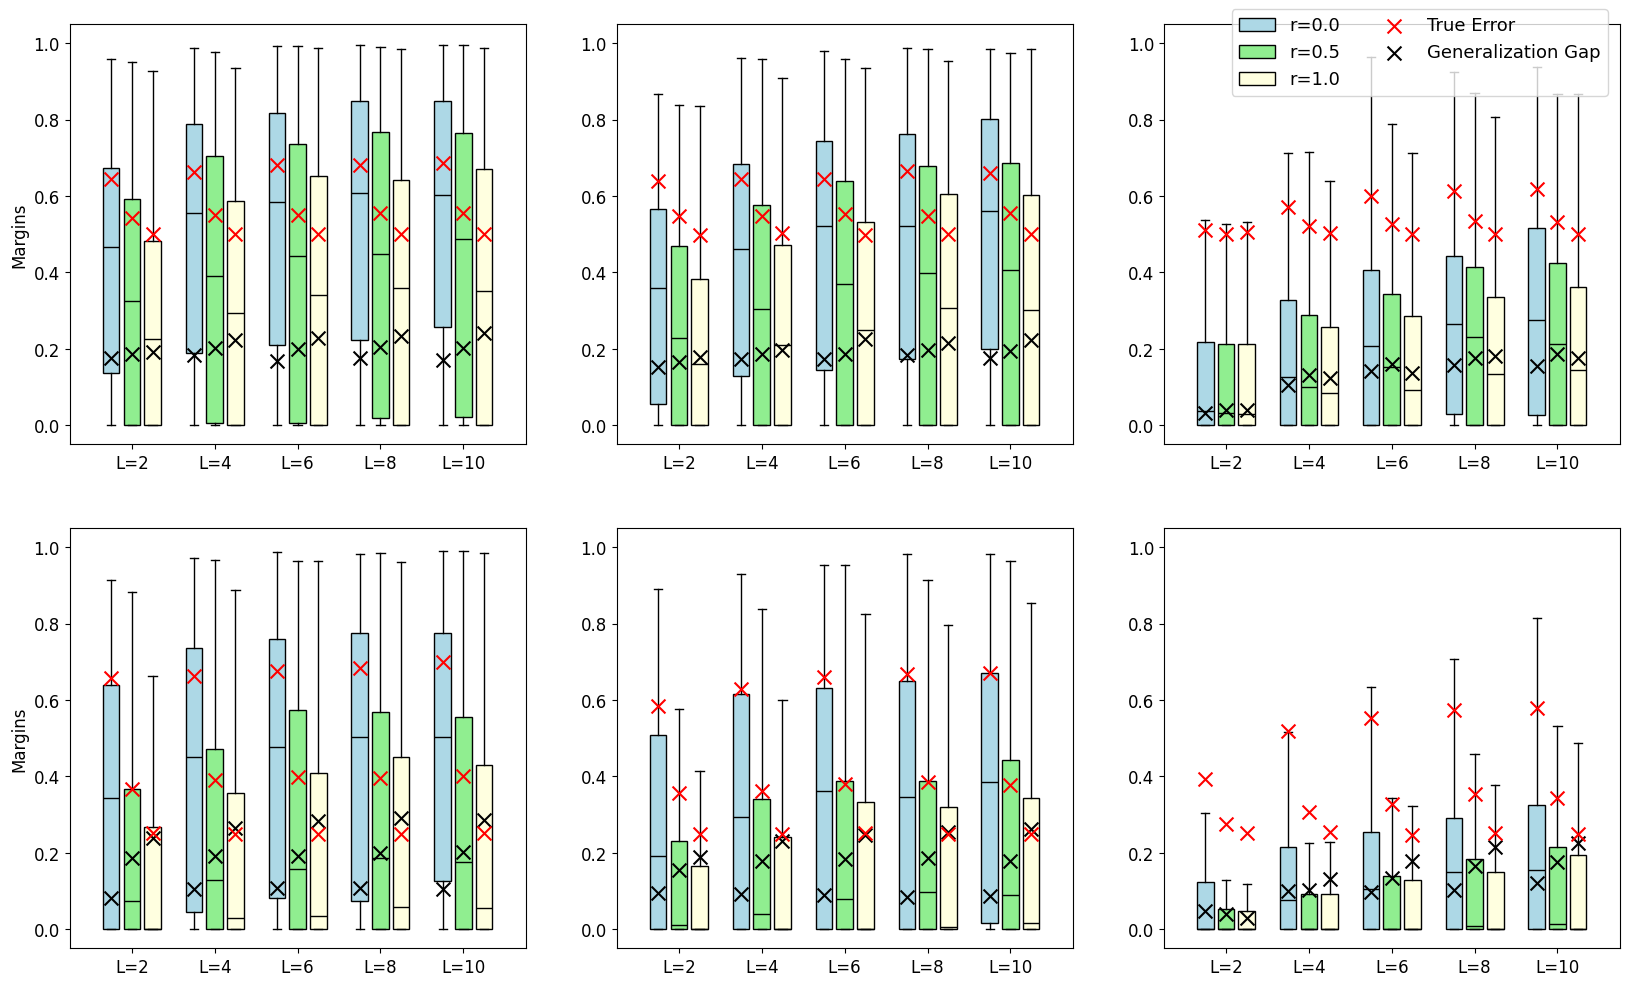

In [120]:
get_marg_box_multiple([2,4], ["QCNN_not_shared", "QCNN_shared", "SEL"])
